In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torchsummary import summary
import matplotlib.pyplot as plt
from model import Net
from utils import GetMNISTDataLoaders, TrainTestModel

In [2]:
cuda = torch.cuda.is_available()
device = torch.device('cuda' if cuda else 'cpu')
print("device is : ", device)

device is :  cuda


In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])


In [4]:
train_loader, test_loader = GetMNISTDataLoaders(train_transforms, test_transforms, batch_size=512, num_workers=2, pin_memory=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 289198197.33it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 17414562.08it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 169262375.40it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21872019.25it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



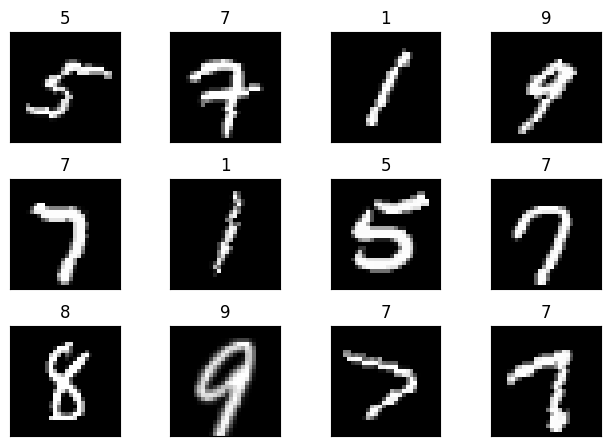

In [5]:
batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(batch_data[i].squeeze(0), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])

In [6]:
model = Net().to(device)
model

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (fc1): Linear(in_features=4096, out_features=50, bias=False)
  (fc2): Linear(in_features=50, out_features=10, bias=False)
)

In [7]:
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1)
num_epochs = 20
criterion = F.nll_loss

train_losses, train_acc, test_losses, test_acc = TrainTestModel(model, criterion, optimizer, scheduler, train_loader, test_loader, num_epochs, device)

Epoch 1


Train: Loss=0.9636 Batch_id=117 Accuracy=38.66: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]


Test set: Average loss: 0.6726, Accuracy: 7892/10000 (78.92%)

Epoch 2


Train: Loss=0.1926 Batch_id=117 Accuracy=89.60: 100%|██████████| 118/118 [00:23<00:00,  5.11it/s]


Test set: Average loss: 0.1062, Accuracy: 9666/10000 (96.66%)

Epoch 3


Train: Loss=0.0824 Batch_id=117 Accuracy=95.59: 100%|██████████| 118/118 [00:22<00:00,  5.23it/s]


Test set: Average loss: 0.0694, Accuracy: 9785/10000 (97.85%)

Epoch 4


Train: Loss=0.0639 Batch_id=117 Accuracy=96.83: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0551, Accuracy: 9825/10000 (98.25%)

Epoch 5


Train: Loss=0.1072 Batch_id=117 Accuracy=97.23: 100%|██████████| 118/118 [00:22<00:00,  5.32it/s]


Test set: Average loss: 0.0481, Accuracy: 9838/10000 (98.38%)

Epoch 6


Train: Loss=0.0440 Batch_id=117 Accuracy=97.67: 100%|██████████| 118/118 [00:24<00:00,  4.83it/s]


Test set: Average loss: 0.0401, Accuracy: 9876/10000 (98.76%)

Epoch 7


Train: Loss=0.0521 Batch_id=117 Accuracy=98.00: 100%|██████████| 118/118 [00:22<00:00,  5.30it/s]


Test set: Average loss: 0.0369, Accuracy: 9867/10000 (98.67%)

Epoch 8


Train: Loss=0.0852 Batch_id=117 Accuracy=98.15: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.0347, Accuracy: 9881/10000 (98.81%)

Epoch 9


Train: Loss=0.0577 Batch_id=117 Accuracy=98.28: 100%|██████████| 118/118 [00:21<00:00,  5.46it/s]


Test set: Average loss: 0.0339, Accuracy: 9875/10000 (98.75%)

Epoch 10


Train: Loss=0.0093 Batch_id=117 Accuracy=98.40: 100%|██████████| 118/118 [00:21<00:00,  5.59it/s]


Test set: Average loss: 0.0341, Accuracy: 9888/10000 (98.88%)

Epoch 11


Train: Loss=0.0621 Batch_id=117 Accuracy=98.53: 100%|██████████| 118/118 [00:21<00:00,  5.53it/s]


Test set: Average loss: 0.0388, Accuracy: 9885/10000 (98.85%)

Epoch 12


Train: Loss=0.1674 Batch_id=117 Accuracy=98.52: 100%|██████████| 118/118 [00:21<00:00,  5.52it/s]


Test set: Average loss: 0.0284, Accuracy: 9903/10000 (99.03%)

Epoch 13


Train: Loss=0.0841 Batch_id=117 Accuracy=98.68: 100%|██████████| 118/118 [00:22<00:00,  5.27it/s]


Test set: Average loss: 0.0265, Accuracy: 9906/10000 (99.06%)

Epoch 14


Train: Loss=0.0430 Batch_id=117 Accuracy=98.77: 100%|██████████| 118/118 [00:22<00:00,  5.21it/s]


Test set: Average loss: 0.0296, Accuracy: 9901/10000 (99.01%)

Epoch 15


Train: Loss=0.0947 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 0.0242, Accuracy: 9911/10000 (99.11%)

Epoch 16


Train: Loss=0.0058 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [00:23<00:00,  5.07it/s]


Test set: Average loss: 0.0217, Accuracy: 9921/10000 (99.21%)

Epoch 17


Train: Loss=0.0069 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [00:23<00:00,  5.11it/s]


Test set: Average loss: 0.0213, Accuracy: 9920/10000 (99.20%)

Epoch 18


Train: Loss=0.0058 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [00:22<00:00,  5.30it/s]


Test set: Average loss: 0.0215, Accuracy: 9923/10000 (99.23%)

Epoch 19


Train: Loss=0.0060 Batch_id=117 Accuracy=99.09: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]


Test set: Average loss: 0.0210, Accuracy: 9921/10000 (99.21%)

Epoch 20


Train: Loss=0.0193 Batch_id=117 Accuracy=99.18: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.0211, Accuracy: 9917/10000 (99.17%)



Text(0.5, 1.0, 'Test Accuracy')

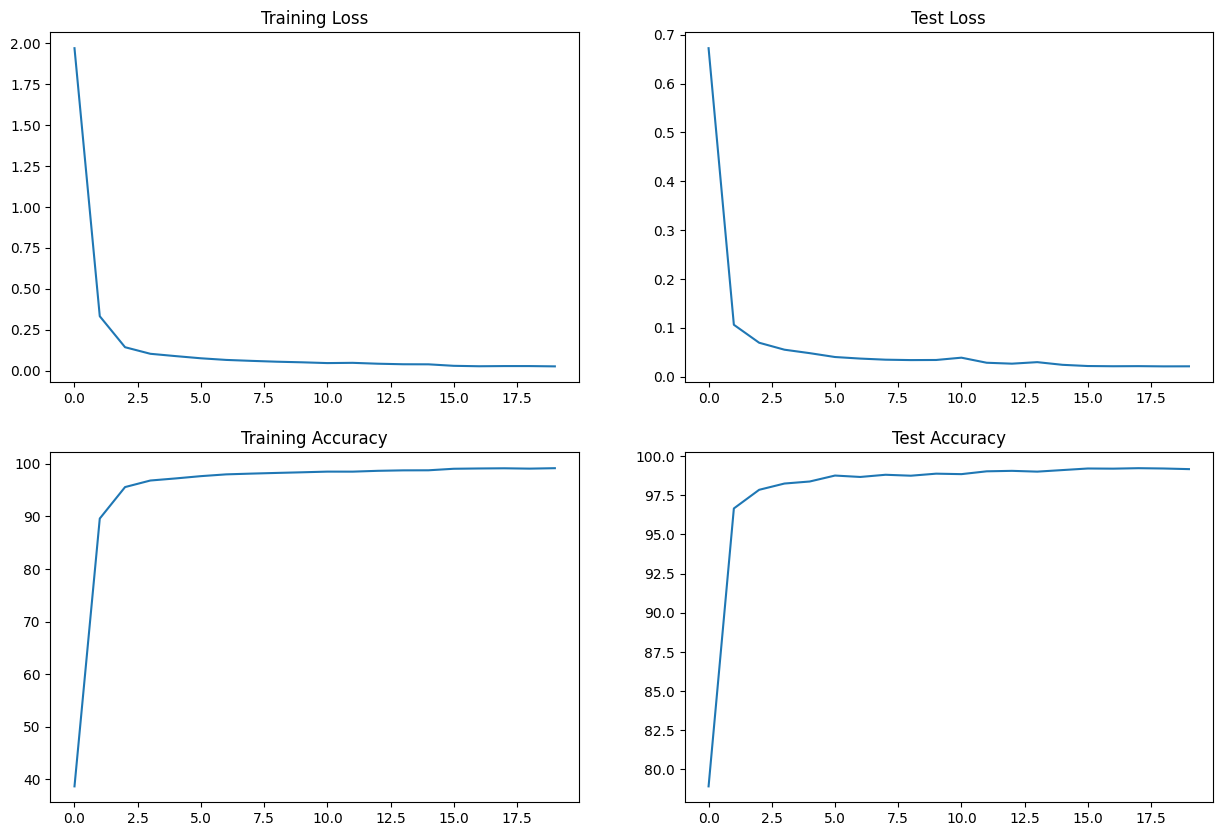

In [9]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")